In [10]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import pickle
import seaborn as sns
import datetime as dt
from model import StockEnv,get_scaler, play_one_episode, LinearModel, DQNAgent
from tqdm.notebook import tqdm
import pyfolio as pf
%matplotlib inline

Stock name: SCCO
Start: 2013-02-19 00:00:00, End: 2020-12-31 00:00:00
Training data: 1227 
Tsesting data: 756 


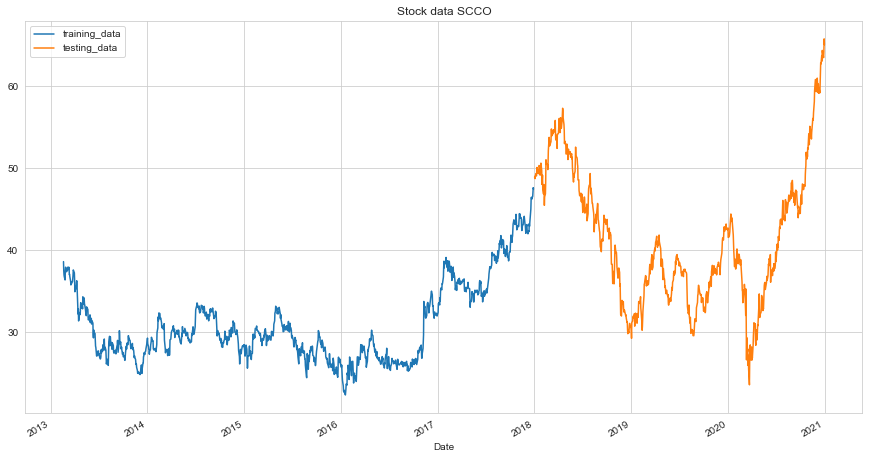

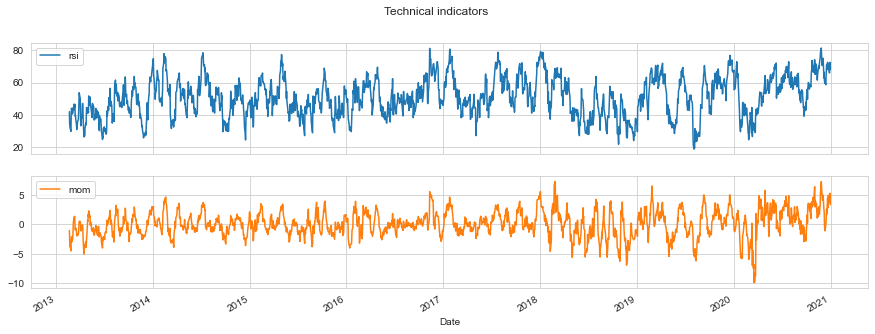

In [11]:
stock_name = 'scco'.upper()
industry = 'Basic Materials'
stock_data = pd.read_csv(f'../train_test_data/{stock_name}.csv', index_col=['Date'], parse_dates=True)

train_data = stock_data.loc[:'2018-01-01']
test_data = stock_data.loc['2018-01-01':]

print(f'Stock name: {stock_name}')
print(f'Start: {stock_data.index[0]}, End: {stock_data.index[-1]}')
print(f'Training data: {len(train_data)} ')
print(f'Tsesting data: {len(test_data)} ')

sns.set_style('whitegrid')
train_data['Adj Close'].plot(label='training_data', figsize=(15,8));
test_data['Adj Close'].plot(label='testing_data');
plt.title('Stock data '+ stock_name)
plt.legend();
plt.show()

stock_data[['rsi', 'mom']].plot(subplots=True, figsize=(15,5), title='Technical indicators');
plt.show()




In [12]:
num_episodes = 2000
batch_size = 32
capital = 1000
data = stock_data['Adj Close'].values
n_timesteps = data.shape[0]


env = StockEnv(train_data, capital)
state_size = env.state_dim
action_size = 2
agent = DQNAgent(state_size, action_size)
scaler = get_scaler(env)

  0%|          | 0/2000 [00:00<?, ?it/s]

episode: 1/2000, episode end value: 1171.78, duration: 0:00:00.231051
episode: 2/2000, episode end value: 1169.65, duration: 0:00:00.212049
episode: 3/2000, episode end value: 1159.72, duration: 0:00:00.206046
episode: 4/2000, episode end value: 1162.39, duration: 0:00:00.208065
episode: 5/2000, episode end value: 1137.15, duration: 0:00:00.221029
episode: 6/2000, episode end value: 1162.68, duration: 0:00:00.216050
episode: 7/2000, episode end value: 1135.02, duration: 0:00:00.223068
episode: 8/2000, episode end value: 1143.49, duration: 0:00:00.219031
episode: 9/2000, episode end value: 1149.73, duration: 0:00:00.219050
episode: 10/2000, episode end value: 1151.50, duration: 0:00:00.217066
episode: 11/2000, episode end value: 1160.91, duration: 0:00:00.221032
episode: 12/2000, episode end value: 1147.06, duration: 0:00:00.217049
episode: 13/2000, episode end value: 1156.93, duration: 0:00:00.216059
episode: 14/2000, episode end value: 1142.40, duration: 0:00:00.202034
episode: 15/200

episode: 118/2000, episode end value: 1150.19, duration: 0:00:00.241057
episode: 119/2000, episode end value: 1144.78, duration: 0:00:00.221050
episode: 120/2000, episode end value: 1144.25, duration: 0:00:00.218029
episode: 121/2000, episode end value: 1174.04, duration: 0:00:00.227051
episode: 122/2000, episode end value: 1254.38, duration: 0:00:00.273070
episode: 123/2000, episode end value: 1137.23, duration: 0:00:00.200027
episode: 124/2000, episode end value: 1112.11, duration: 0:00:00.190041
episode: 125/2000, episode end value: 1148.48, duration: 0:00:00.204059
episode: 126/2000, episode end value: 1132.19, duration: 0:00:00.212045
episode: 127/2000, episode end value: 1186.71, duration: 0:00:00.243042
episode: 128/2000, episode end value: 1121.58, duration: 0:00:00.214052
episode: 129/2000, episode end value: 1134.96, duration: 0:00:00.223050
episode: 130/2000, episode end value: 1154.83, duration: 0:00:00.238059
episode: 131/2000, episode end value: 1125.54, duration: 0:00:00

episode: 232/2000, episode end value: 1264.88, duration: 0:00:00.229036
episode: 233/2000, episode end value: 1271.49, duration: 0:00:00.238052
episode: 234/2000, episode end value: 1236.59, duration: 0:00:00.195051
episode: 235/2000, episode end value: 1348.32, duration: 0:00:00.225043
episode: 236/2000, episode end value: 1209.12, duration: 0:00:00.155048
episode: 237/2000, episode end value: 1265.04, duration: 0:00:00.194038
episode: 238/2000, episode end value: 1220.85, duration: 0:00:00.220030
episode: 239/2000, episode end value: 1264.37, duration: 0:00:00.207054
episode: 240/2000, episode end value: 1331.22, duration: 0:00:00.223037
episode: 241/2000, episode end value: 1221.03, duration: 0:00:00.206044
episode: 242/2000, episode end value: 1217.31, duration: 0:00:00.204061
episode: 243/2000, episode end value: 1281.28, duration: 0:00:00.209047
episode: 244/2000, episode end value: 1225.64, duration: 0:00:00.226055
episode: 245/2000, episode end value: 1409.86, duration: 0:00:00

episode: 346/2000, episode end value: 1364.39, duration: 0:00:00.218035
episode: 347/2000, episode end value: 1269.74, duration: 0:00:00.218065
episode: 348/2000, episode end value: 1347.49, duration: 0:00:00.212032
episode: 349/2000, episode end value: 1226.51, duration: 0:00:00.223065
episode: 350/2000, episode end value: 1266.48, duration: 0:00:00.229052
episode: 351/2000, episode end value: 1392.33, duration: 0:00:00.184038
episode: 352/2000, episode end value: 1359.29, duration: 0:00:00.213048
episode: 353/2000, episode end value: 1240.06, duration: 0:00:00.240039
episode: 354/2000, episode end value: 1212.22, duration: 0:00:00.217048
episode: 355/2000, episode end value: 1394.81, duration: 0:00:00.195058
episode: 356/2000, episode end value: 1267.72, duration: 0:00:00.219035
episode: 357/2000, episode end value: 1375.12, duration: 0:00:00.203046
episode: 358/2000, episode end value: 1324.85, duration: 0:00:00.208031
episode: 359/2000, episode end value: 1258.86, duration: 0:00:00

episode: 461/2000, episode end value: 1219.48, duration: 0:00:00.227066
episode: 462/2000, episode end value: 1278.88, duration: 0:00:00.217047
episode: 463/2000, episode end value: 1296.57, duration: 0:00:00.204043
episode: 464/2000, episode end value: 1390.01, duration: 0:00:00.185042
episode: 465/2000, episode end value: 1290.28, duration: 0:00:00.209033
episode: 466/2000, episode end value: 1440.70, duration: 0:00:00.215048
episode: 467/2000, episode end value: 1422.00, duration: 0:00:00.219047
episode: 468/2000, episode end value: 1373.87, duration: 0:00:00.213050
episode: 469/2000, episode end value: 1347.92, duration: 0:00:00.200058
episode: 470/2000, episode end value: 1256.46, duration: 0:00:00.220049
episode: 471/2000, episode end value: 1295.92, duration: 0:00:00.203042
episode: 472/2000, episode end value: 1236.95, duration: 0:00:00.237042
episode: 473/2000, episode end value: 1256.49, duration: 0:00:00.244054
episode: 474/2000, episode end value: 1269.02, duration: 0:00:00

episode: 575/2000, episode end value: 1369.44, duration: 0:00:00.213048
episode: 576/2000, episode end value: 1343.64, duration: 0:00:00.198050
episode: 577/2000, episode end value: 1380.31, duration: 0:00:00.208042
episode: 578/2000, episode end value: 1374.26, duration: 0:00:00.209046
episode: 579/2000, episode end value: 1268.01, duration: 0:00:00.233052
episode: 580/2000, episode end value: 1362.11, duration: 0:00:00.209063
episode: 581/2000, episode end value: 1294.86, duration: 0:00:00.222046
episode: 582/2000, episode end value: 1372.02, duration: 0:00:00.199042
episode: 583/2000, episode end value: 1372.40, duration: 0:00:00.207052
episode: 584/2000, episode end value: 1370.73, duration: 0:00:00.220035
episode: 585/2000, episode end value: 1351.89, duration: 0:00:00.229050
episode: 586/2000, episode end value: 1250.80, duration: 0:00:00.237053
episode: 587/2000, episode end value: 1366.30, duration: 0:00:00.201062
episode: 588/2000, episode end value: 1327.72, duration: 0:00:00

episode: 689/2000, episode end value: 1321.25, duration: 0:00:00.210032
episode: 690/2000, episode end value: 1212.61, duration: 0:00:00.240069
episode: 691/2000, episode end value: 1354.68, duration: 0:00:00.184042
episode: 692/2000, episode end value: 1364.27, duration: 0:00:00.211045
episode: 693/2000, episode end value: 1262.20, duration: 0:00:00.220048
episode: 694/2000, episode end value: 1347.75, duration: 0:00:00.205047
episode: 695/2000, episode end value: 1221.24, duration: 0:00:00.241053
episode: 696/2000, episode end value: 1368.23, duration: 0:00:00.188040
episode: 697/2000, episode end value: 1389.70, duration: 0:00:00.200045
episode: 698/2000, episode end value: 1327.64, duration: 0:00:00.208040
episode: 699/2000, episode end value: 1230.24, duration: 0:00:00.225056
episode: 700/2000, episode end value: 1261.77, duration: 0:00:00.206046
episode: 701/2000, episode end value: 1264.61, duration: 0:00:00.215048
episode: 702/2000, episode end value: 1113.95, duration: 0:00:00

episode: 804/2000, episode end value: 1330.70, duration: 0:00:00.207030
episode: 805/2000, episode end value: 1442.24, duration: 0:00:00.219047
episode: 806/2000, episode end value: 1344.26, duration: 0:00:00.228052
episode: 807/2000, episode end value: 1446.40, duration: 0:00:00.226049
episode: 808/2000, episode end value: 1413.70, duration: 0:00:00.221066
episode: 809/2000, episode end value: 1365.55, duration: 0:00:00.212060
episode: 810/2000, episode end value: 1305.18, duration: 0:00:00.205039
episode: 811/2000, episode end value: 1373.42, duration: 0:00:00.194053
episode: 812/2000, episode end value: 1256.79, duration: 0:00:00.224041
episode: 813/2000, episode end value: 1363.41, duration: 0:00:00.201045
episode: 814/2000, episode end value: 1344.05, duration: 0:00:00.195059
episode: 815/2000, episode end value: 1261.94, duration: 0:00:00.223049
episode: 816/2000, episode end value: 1341.62, duration: 0:00:00.183047
episode: 817/2000, episode end value: 1292.91, duration: 0:00:00

episode: 918/2000, episode end value: 1275.96, duration: 0:00:00.204036
episode: 919/2000, episode end value: 1212.35, duration: 0:00:00.217034
episode: 920/2000, episode end value: 1329.67, duration: 0:00:00.206046
episode: 921/2000, episode end value: 1359.53, duration: 0:00:00.214062
episode: 922/2000, episode end value: 1329.61, duration: 0:00:00.208040
episode: 923/2000, episode end value: 1367.59, duration: 0:00:00.214049
episode: 924/2000, episode end value: 1377.12, duration: 0:00:00.189042
episode: 925/2000, episode end value: 1375.83, duration: 0:00:00.204047
episode: 926/2000, episode end value: 1208.21, duration: 0:00:00.235035
episode: 927/2000, episode end value: 1311.26, duration: 0:00:00.220050
episode: 928/2000, episode end value: 1225.64, duration: 0:00:00.228066
episode: 929/2000, episode end value: 1248.54, duration: 0:00:00.220050
episode: 930/2000, episode end value: 1366.66, duration: 0:00:00.198044
episode: 931/2000, episode end value: 1357.07, duration: 0:00:00

episode: 1033/2000, episode end value: 1320.49, duration: 0:00:00.235057
episode: 1034/2000, episode end value: 1263.87, duration: 0:00:00.257052
episode: 1035/2000, episode end value: 1293.55, duration: 0:00:00.222064
episode: 1036/2000, episode end value: 1262.26, duration: 0:00:00.223050
episode: 1037/2000, episode end value: 1361.19, duration: 0:00:00.225035
episode: 1038/2000, episode end value: 1333.92, duration: 0:00:00.241068
episode: 1039/2000, episode end value: 1289.11, duration: 0:00:00.238069
episode: 1040/2000, episode end value: 1377.17, duration: 0:00:00.220048
episode: 1041/2000, episode end value: 1294.85, duration: 0:00:00.241037
episode: 1042/2000, episode end value: 1344.74, duration: 0:00:00.211056
episode: 1043/2000, episode end value: 1248.10, duration: 0:00:00.241046
episode: 1044/2000, episode end value: 1215.96, duration: 0:00:00.239061
episode: 1045/2000, episode end value: 1335.90, duration: 0:00:00.227052
episode: 1046/2000, episode end value: 1336.71, dur

episode: 1147/2000, episode end value: 1271.45, duration: 0:00:00.242040
episode: 1148/2000, episode end value: 1272.25, duration: 0:00:00.250056
episode: 1149/2000, episode end value: 1372.11, duration: 0:00:00.216048
episode: 1150/2000, episode end value: 1230.13, duration: 0:00:00.257071
episode: 1151/2000, episode end value: 1252.36, duration: 0:00:00.232055
episode: 1152/2000, episode end value: 1346.54, duration: 0:00:00.219046
episode: 1153/2000, episode end value: 1242.41, duration: 0:00:00.231035
episode: 1154/2000, episode end value: 1230.23, duration: 0:00:00.225067
episode: 1155/2000, episode end value: 1306.24, duration: 0:00:00.225050
episode: 1156/2000, episode end value: 1257.15, duration: 0:00:00.231045
episode: 1157/2000, episode end value: 1365.13, duration: 0:00:00.223058
episode: 1158/2000, episode end value: 1402.94, duration: 0:00:00.224047
episode: 1159/2000, episode end value: 1209.21, duration: 0:00:00.229051
episode: 1160/2000, episode end value: 1380.44, dur

episode: 1260/2000, episode end value: 1313.61, duration: 0:00:00.212050
episode: 1261/2000, episode end value: 1358.39, duration: 0:00:00.206043
episode: 1262/2000, episode end value: 1262.94, duration: 0:00:00.241040
episode: 1263/2000, episode end value: 1298.21, duration: 0:00:00.198060
episode: 1264/2000, episode end value: 1354.63, duration: 0:00:00.215047
episode: 1265/2000, episode end value: 1215.84, duration: 0:00:00.236052
episode: 1266/2000, episode end value: 1219.51, duration: 0:00:00.231037
episode: 1267/2000, episode end value: 1247.77, duration: 0:00:00.237068
episode: 1268/2000, episode end value: 1368.18, duration: 0:00:00.214044
episode: 1269/2000, episode end value: 1270.92, duration: 0:00:00.230051
episode: 1270/2000, episode end value: 1258.62, duration: 0:00:00.223049
episode: 1271/2000, episode end value: 1352.90, duration: 0:00:00.231035
episode: 1272/2000, episode end value: 1295.68, duration: 0:00:00.241075
episode: 1273/2000, episode end value: 1329.88, dur

episode: 1374/2000, episode end value: 1347.47, duration: 0:00:00.229038
episode: 1375/2000, episode end value: 1372.81, duration: 0:00:00.218047
episode: 1376/2000, episode end value: 1310.11, duration: 0:00:00.230052
episode: 1377/2000, episode end value: 1257.99, duration: 0:00:00.243069
episode: 1378/2000, episode end value: 1250.68, duration: 0:00:00.232053
episode: 1379/2000, episode end value: 1352.81, duration: 0:00:00.221049
episode: 1380/2000, episode end value: 1363.90, duration: 0:00:00.219047
episode: 1381/2000, episode end value: 1442.48, duration: 0:00:00.209056
episode: 1382/2000, episode end value: 1241.30, duration: 0:00:00.229045
episode: 1383/2000, episode end value: 1350.68, duration: 0:00:00.217057
episode: 1384/2000, episode end value: 1357.78, duration: 0:00:00.227048
episode: 1385/2000, episode end value: 1419.17, duration: 0:00:00.220051
episode: 1386/2000, episode end value: 1315.97, duration: 0:00:00.221046
episode: 1387/2000, episode end value: 1227.67, dur

episode: 1487/2000, episode end value: 1263.82, duration: 0:00:00.238040
episode: 1488/2000, episode end value: 1308.02, duration: 0:00:00.217063
episode: 1489/2000, episode end value: 1268.38, duration: 0:00:00.236038
episode: 1490/2000, episode end value: 1269.89, duration: 0:00:00.232065
episode: 1491/2000, episode end value: 1390.48, duration: 0:00:00.212033
episode: 1492/2000, episode end value: 1331.98, duration: 0:00:00.232052
episode: 1493/2000, episode end value: 1380.16, duration: 0:00:00.231056
episode: 1494/2000, episode end value: 1372.47, duration: 0:00:00.230035
episode: 1495/2000, episode end value: 1328.49, duration: 0:00:00.224051
episode: 1496/2000, episode end value: 1372.63, duration: 0:00:00.233052
episode: 1497/2000, episode end value: 1362.49, duration: 0:00:00.237054
episode: 1498/2000, episode end value: 1284.55, duration: 0:00:00.234066
episode: 1499/2000, episode end value: 1387.43, duration: 0:00:00.213047
episode: 1500/2000, episode end value: 1392.86, dur

episode: 1601/2000, episode end value: 1324.00, duration: 0:00:00.225049
episode: 1602/2000, episode end value: 1324.67, duration: 0:00:00.216034
episode: 1603/2000, episode end value: 1314.53, duration: 0:00:00.220056
episode: 1604/2000, episode end value: 1223.77, duration: 0:00:00.238052
episode: 1605/2000, episode end value: 1373.98, duration: 0:00:00.210050
episode: 1606/2000, episode end value: 1218.68, duration: 0:00:00.235049
episode: 1607/2000, episode end value: 1384.30, duration: 0:00:00.230052
episode: 1608/2000, episode end value: 1223.66, duration: 0:00:00.240056
episode: 1609/2000, episode end value: 1359.78, duration: 0:00:00.212050
episode: 1610/2000, episode end value: 1268.02, duration: 0:00:00.236039
episode: 1611/2000, episode end value: 1357.98, duration: 0:00:00.221065
episode: 1612/2000, episode end value: 1232.25, duration: 0:00:00.249039
episode: 1613/2000, episode end value: 1402.87, duration: 0:00:00.208063
episode: 1614/2000, episode end value: 1292.63, dur

episode: 1714/2000, episode end value: 1314.45, duration: 0:00:00.230051
episode: 1715/2000, episode end value: 1270.23, duration: 0:00:00.237056
episode: 1716/2000, episode end value: 1218.20, duration: 0:00:00.242055
episode: 1717/2000, episode end value: 1339.42, duration: 0:00:00.210047
episode: 1718/2000, episode end value: 1351.89, duration: 0:00:00.206038
episode: 1719/2000, episode end value: 1253.41, duration: 0:00:00.241052
episode: 1720/2000, episode end value: 1227.59, duration: 0:00:00.232053
episode: 1721/2000, episode end value: 1347.72, duration: 0:00:00.219050
episode: 1722/2000, episode end value: 1341.20, duration: 0:00:00.228034
episode: 1723/2000, episode end value: 1339.03, duration: 0:00:00.231052
episode: 1724/2000, episode end value: 1210.29, duration: 0:00:00.243070
episode: 1725/2000, episode end value: 1195.61, duration: 0:00:00.240050
episode: 1726/2000, episode end value: 1182.84, duration: 0:00:00.230053
episode: 1727/2000, episode end value: 1185.71, dur

episode: 1828/2000, episode end value: 1176.93, duration: 0:00:00.209046
episode: 1829/2000, episode end value: 1124.35, duration: 0:00:00.201062
episode: 1830/2000, episode end value: 1147.56, duration: 0:00:00.205048
episode: 1831/2000, episode end value: 1141.72, duration: 0:00:00.203047
episode: 1832/2000, episode end value: 1131.54, duration: 0:00:00.207045
episode: 1833/2000, episode end value: 1158.79, duration: 0:00:00.219055
episode: 1834/2000, episode end value: 1136.16, duration: 0:00:00.212041
episode: 1835/2000, episode end value: 1140.22, duration: 0:00:00.210046
episode: 1836/2000, episode end value: 1142.25, duration: 0:00:00.210039
episode: 1837/2000, episode end value: 1164.60, duration: 0:00:00.222031
episode: 1838/2000, episode end value: 1147.31, duration: 0:00:00.227066
episode: 1839/2000, episode end value: 1179.83, duration: 0:00:00.232052
episode: 1840/2000, episode end value: 1160.71, duration: 0:00:00.221057
episode: 1841/2000, episode end value: 1284.05, dur

episode: 1941/2000, episode end value: 1335.55, duration: 0:00:00.229052
episode: 1942/2000, episode end value: 1199.87, duration: 0:00:00.216047
episode: 1943/2000, episode end value: 1269.48, duration: 0:00:00.230047
episode: 1944/2000, episode end value: 1270.12, duration: 0:00:00.232042
episode: 1945/2000, episode end value: 1436.25, duration: 0:00:00.212062
episode: 1946/2000, episode end value: 1259.79, duration: 0:00:00.223039
episode: 1947/2000, episode end value: 1269.94, duration: 0:00:00.203060
episode: 1948/2000, episode end value: 1325.41, duration: 0:00:00.214048
episode: 1949/2000, episode end value: 1242.65, duration: 0:00:00.232051
episode: 1950/2000, episode end value: 1304.03, duration: 0:00:00.224037
episode: 1951/2000, episode end value: 1360.98, duration: 0:00:00.218061
episode: 1952/2000, episode end value: 1378.01, duration: 0:00:00.214054
episode: 1953/2000, episode end value: 1271.71, duration: 0:00:02.003040
episode: 1954/2000, episode end value: 1363.48, dur

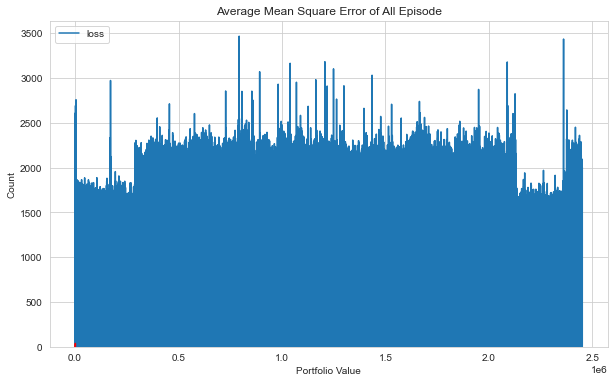

In [13]:
#train


mode = 'train'

portfolio_value = []



for e in tqdm(range(num_episodes)):
    t0 = datetime.now()
    val = play_one_episode(agent, env, mode, scaler)
    dt = datetime.now() - t0
    print(f"episode: {e + 1}/{num_episodes}, episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
    portfolio_value.append(val['portfolio_value'][-1]) 


if mode == 'train':
    # save the DQN
    agent.save(f'state_dict/{stock_name}.npz')

    # save the scaler
    with open(f'scaler/{stock_name}.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    # plot losses
    loss = agent.model.losses
    losses = pd.DataFrame(loss, columns=['loss'])
    losses.plot(figsize=(10,6))
    plt.title('Average Mean Square Error of All Episode')
    plt.xlabel('Step')
    plt.ylabel('Mean Square Error')

print(f'average reward: {np.mean(portfolio_value):.2f}, min: {np.min(portfolio_value):.2f}, max: {np.max(portfolio_value):.2f}')
sns.histplot(portfolio_value, bins=100, color='r', kde=True);
plt.xlabel('Portfolio Value');
plt.ylabel('Count');

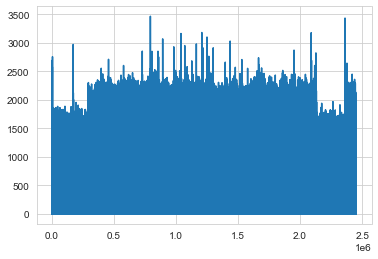

In [14]:
plt.plot(agent.model.losses)

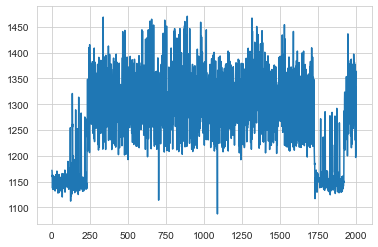

In [15]:
plt.plot(portfolio_value)

episode end value: 1624.20, duration: 0:00:00.064017
Sell: 80 times, Buy: 68 times


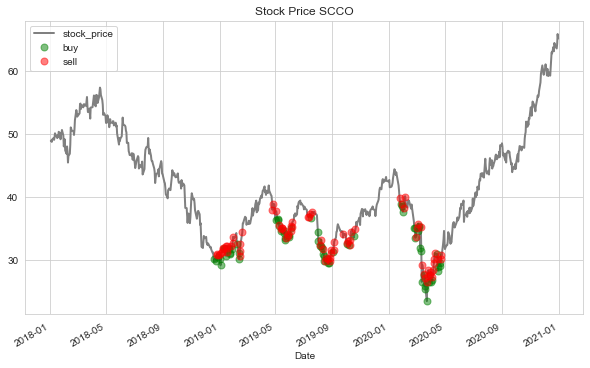

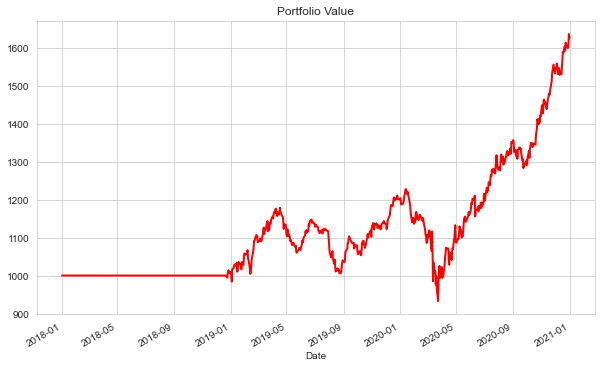

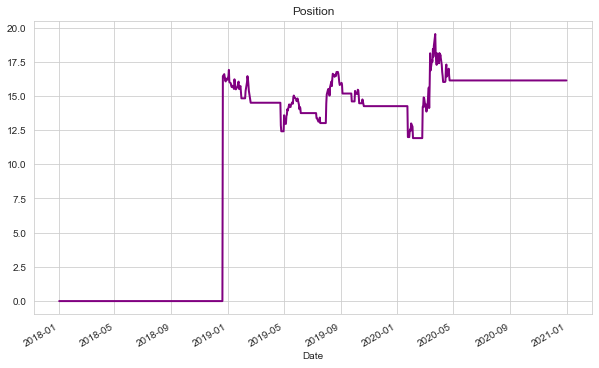

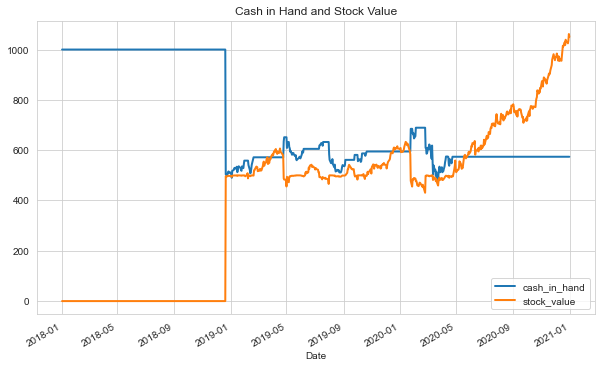

In [16]:
#test

mode = 'test'

portfolio_value = []


with open(f'scaler/{stock_name}.pkl', 'rb') as f:
    scaler = pickle.load(f)
    
env = StockEnv(test_data, capital)
agent.epsilon = 0
agent.load(f'state_dict/{stock_name}.npz')



t0 = datetime.now()
val = play_one_episode(agent, env, mode, scaler)
dt = datetime.now() - t0
print(f"episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
portfolio_value.append(val['portfolio_value'][-1])
    
print(f"Sell: {env.sell_buy.count('sell')} times, Buy: {env.sell_buy.count('buy')} times")



result = pd.DataFrame(val)
result.index = test_data.index

def marker_buy(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'buy':
        return price
    else:
        return np.nan
    
def marker_sell(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'sell':
        return price
    else:
        return np.nan
    
result['marker_buy'] = result[['stock_price', 'sell_buy']].apply(marker_buy, axis=1);
result['marker_sell'] = result[['stock_price', 'sell_buy']].apply(marker_sell, axis=1);

result['stock_price'].plot(figsize=(10,6), c='grey', lw=2);
result['marker_buy'].plot(style='o', ms=7, label='buy', c='g', alpha=0.5);
result['marker_sell'].plot(style='o', ms=7, label='sell', c='r', alpha=0.5);
plt.title('Stock Price '+ stock_name)
plt.legend();
plt.show()



result['portfolio_value'].plot(figsize=(10,6), c='r', lw=2);
plt.title('Portfolio Value');
plt.show()

result['stock_owned'].plot(figsize=(10,6), c='purple', lw=2);
plt.title('Position')
plt.show()

result[['cash_in_hand', 'stock_value']].plot(figsize=(10,6), lw=2);
plt.title('Cash in Hand and Stock Value');
plt.show()

In [17]:


def CAGR(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    n = len(df)/252
    cagr = (df['cumulative_ret'][-1])**(1/n) - 1
    return cagr

def volatility(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    vol = df['daily_ret'].std() * np.sqrt(252)
    return vol


def sharpe(DF, rf):
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr

def max_dd(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    df['cum_roll_max'] = df['cumulative_ret'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cumulative_ret']
    df['drawdown_pct'] = df['drawdown']/df['cum_roll_max']
    max_dd = df['drawdown_pct'].max()
    return max_dd

def calmer(DF):
    df = DF.copy()
    clmr = CAGR(df)/max_dd(df)
    return clmr



print(f'Stock name: {stock_name}')
print(f'Start: {result.index[0]}  End: {result.index[-1]}')
print(f'Compound Annual Growth Rate: {CAGR(result)*100:.2f} %')
print(f'Volatility: {volatility(result):.4f}')
print(f'shape ratio: {sharpe(result, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(result)*-100:.2f} %')
print(f'Calmar ratio: {calmer(result):.4f}')
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
print('Comparing with Adj close')
print(f'Compound Annual Growth Rate (Adj close): {CAGR(test_data)*100:.2f} %')
print(f'Volatility (benchmark): {volatility(test_data):.4f}')
print(f'shape ratio: {sharpe(test_data, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(test_data)*-100:.2f} %')
print(f'Calmar ratio (benchmark): {calmer(test_data):.4f}')

Stock name: SCCO
Start: 2018-01-02 00:00:00  End: 2020-12-31 00:00:00
Compound Annual Growth Rate: 17.55 %
Volatility: 0.1626
shape ratio: 1.0113
Maximun drawdown: -24.02 %
Calmar ratio: 0.7305
-----------------------------------------------------------
-----------------------------------------------------------
Comparing with Adj close
Compound Annual Growth Rate (Adj close): 10.02 %
Volatility (benchmark): 0.3765
shape ratio: 0.2369
Maximun drawdown: -58.96 %
Calmar ratio (benchmark): 0.1699


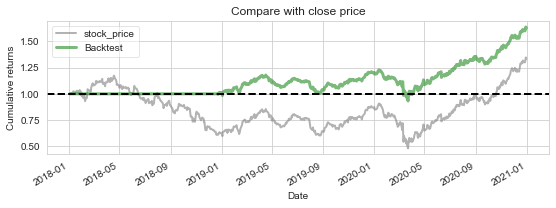

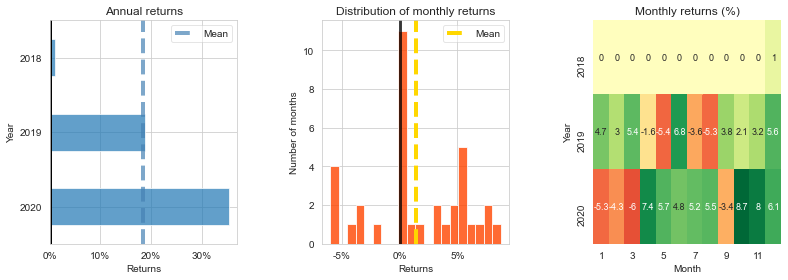

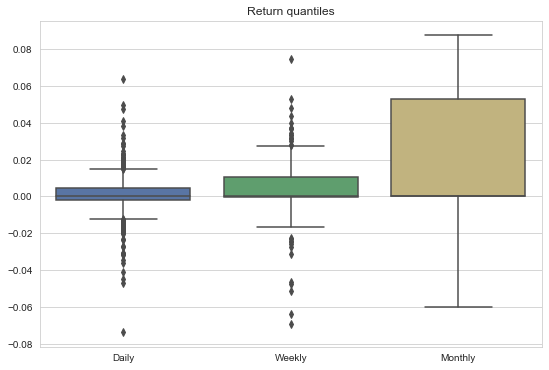

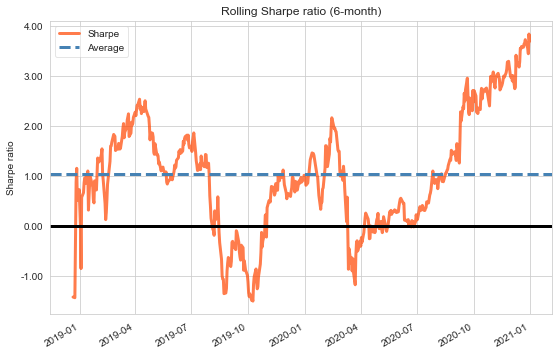

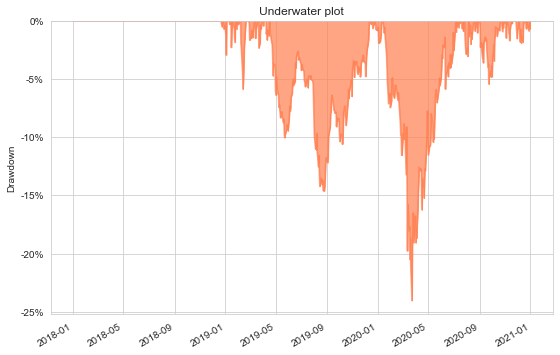

In [18]:


bt_returns = result['portfolio_value'].pct_change()
price = result['stock_price'].pct_change()



plt.figure(figsize=(9,6));
plt.subplot(2,1,1);
pf.plotting.plot_rolling_returns(bt_returns, price);
plt.title('Compare with close price');
plt.show()

fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(12,4)

plt.figure(figsize=(9,6))
pf.plot_return_quantiles(bt_returns);



plt.figure(figsize=(9,6))
pf.plot_rolling_sharpe(bt_returns);

plt.figure(figsize=(9,6))
pf.plot_drawdown_underwater(bt_returns);

score = (sharpe(result, 0.011) - sharpe(test_data, 0.011))*10
ret = ((result['portfolio_value'][-1] - result['portfolio_value'][0])/result['portfolio_value'][0]) * 100
with open(f'score/{stock_name}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([stock_name, industry,score, ret], f)
    
    
result.to_csv(f'../data/{stock_name}.csv')